In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_pickle(r"C:\Users\PB\Documents\GithubRepos\Generative-Models-for-CERN-Fast-Simulations\data\data_cond_photonsum_proton_5_2312.pkl")
data_cond = pd.read_pickle(r"C:\Users\PB\Documents\GithubRepos\Generative-Models-for-CERN-Fast-Simulations\data\data_cond_photonsum_proton_5_2312.pkl")
data_coord = pd.read_pickle(r"C:\Users\PB\Documents\GithubRepos\Generative-Models-for-CERN-Fast-Simulations\data\data_coord_proton_photonsum_proton_5_2312.pkl")
photon_sum_proton_min, photon_sum_proton_max = data_cond.proton_photon_sum.min(), data_cond.proton_photon_sum.max()
photon_sum_proton_min, photon_sum_proton_max

(5.0, 2312.0)

In [7]:
data_cond

,Energy,Vx,Vy,Vz,Px,Py,Pz,mass,charge,std_proton,proton_photon_sum
0,1304.340,-1.831820e-05,1.555780e-05,5.029320e-02,-0.509192,0.461106,1304.340,0.000000,0.0,0.060663,9.0
1,325.158,0.000000e+00,0.000000e+00,0.000000e+00,0.269915,-0.081921,325.157,139.570610,-1.0,0.020876,5.0
2,3192.380,0.000000e+00,0.000000e+00,0.000000e+00,0.022422,-0.182957,-3192.380,939.565413,0.0,0.071018,16.0
3,2082.630,0.000000e+00,0.000000e+00,0.000000e+00,-0.171176,0.281748,2082.630,938.272081,1.0,0.190404,6.0
4,174.401,4.998120e-06,2.304080e-06,-2.588240e-03,0.292035,0.104749,-174.400,0.000000,0.0,0.038352,14.0
...,...,...,...,...,...,...,...,...,...,...,...
186092,1775.280,-3.317000e-17,-3.109770e-18,-1.414050e-13,-0.416436,-0.039042,-1775.280,497.611000,0.0,0.023191,5.0
186093,4071.230,0.000000e+00,0.000000e+00,0.000000e+00,0.089305,0.069410,-4071.230,1115.683000,0.0,0.427253,1246.0
186094,4003.600,0.000000e+00,0.000000e+00,0.000000e+00,0.769178,-0.276743,4003.600,1115.683000,0.0,0.263543,36.0
186095,892.561,3.026130e-05,-2.853110e-06,1.149290e-01,0.286136,0.021616,892.561,0.000000,0.0,0.026345,9.0


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_pickle('C:\\Users\\PB\\Documents\\GithubRepos\\Generative-Models-for-CERN-Fast-Simulations\\data\\data_proton_photonsum_proton_1_2312.pkl')
data_cond = pd.read_pickle('C:\\Users\\PB\\Documents\\GithubRepos\\Generative-Models-for-CERN-Fast-Simulations\\data\\data_cond_photonsum_proton_1_2312.pkl')
photon_sum_proton_min, photon_sum_proton_max = data_cond.proton_photon_sum.min(), data_cond.proton_photon_sum.max()

# data of coordinates of maximum value of pixel on the images
data_posi = pd.read_pickle('C:\\Users\\PB\\Documents\\GithubRepos\\Generative-Models-for-CERN-Fast-Simulations\\data\\data_coord_proton_photonsum_proton_1_2312.pkl')
print('Loaded positions: ', data_posi.shape, "max:", data_posi.values.max(), "min:", data_posi.values.min())

# group conditional data
data_cond["cond"] = data_cond["Energy"].astype(str) +"|"+ data_cond["Vx"].astype(str) +"|"+ data_cond["Vy"].astype(str) +"|"+ data_cond["Vz"].astype(str) +"|"+  data_cond["Px"].astype(str) +"|"+  data_cond["Py"].astype(str) +"|"+ data_cond["Pz"].astype(str) +"|"+  data_cond["mass"].astype(str) +"|"+  data_cond["charge"].astype(str)
data_cond_id = data_cond[["cond"]].reset_index()
ids = data_cond_id.merge(data_cond_id.sample(frac=1), on=["cond"], how="inner").groupby("index_x").first()
ids = ids["index_y"]

data = np.log(data + 1).astype(np.float32)

data_2 = data[ids]
data_cond = data_cond.drop(columns="cond")

Loaded positions:  (344228, 2) max: 55 min: 0


ValueError: not enough values to unpack (expected 12, got 6)

In [3]:
#
x_train, x_test, x_train_2, x_test_2, y_train, y_test = train_test_split(
    data, data_2, data_cond, test_size=0.2, shuffle=False)

print("Data shapes:", x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Data shapes: (275382, 56, 30) (68846, 56, 30) (275382, 13) (68846, 13)


<Axes: >

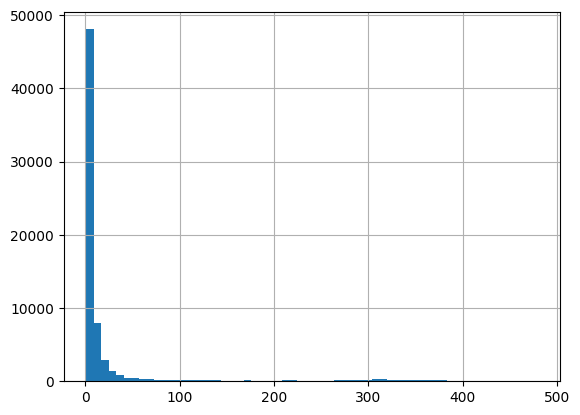

In [14]:
pd.Series(x_test.sum(axis=(1, 2))).hist(bins=60)